[View in Colaboratory](https://colab.research.google.com/github/PiyuGandhi/Optimization-Strategies/blob/master/Optimization_Strategies.ipynb)

In [0]:
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation
from tensorflow.python.keras.utils import np_utils

## Load training data

In [3]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

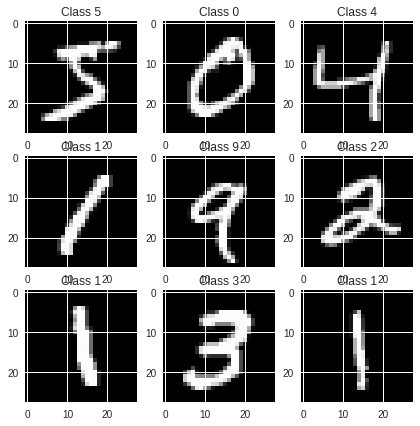

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network

In [0]:
def create_model(optimizer):
  model = Sequential()
  model.add(Dense(512, input_shape=(784,)))
  model.add(Activation('relu')) 
  model.add(Dropout(0.2))
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10))
  model.add(Activation('softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics= ['accuracy'])
  return model


def analyze_approach(model, visualize= False):
  print(model.summary())
  print("Training Model")
  history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20, 
          verbose=1,
          validation_data=(X_test, Y_test))
  score = model.evaluate(X_test, Y_test, verbose=1)
  print('Test score:', score[0])
  print('Test accuracy:', score[1])
  
  predicted_classes = model.predict_classes(X_test)

  correct_indices = np.nonzero(predicted_classes == y_test)[0]
  incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
  if visualize == True:
    plt.figure()
    print("Visualising Predictions:")
    for i, correct in enumerate(correct_indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

    plt.figure()
    for i, incorrect in enumerate(incorrect_indices[:9]):
        plt.subplot(3,3,i+1)
        plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
  return score[1], history



Now let's look at the performance of different visualizers

## Adam

In [8]:
model_adam = create_model(optimizer= 'adam')
accuracy_adam, history_adam = analyze_approach(model_adam)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
__________

## RMSProp

In [9]:
model_rms = create_model('rmsprop')
accuracy_rms, history_rms = analyze_approach(model_rms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
__________

## Stochastic Gradient Descent

In [10]:
model_sgd = create_model('sgd')
accuracy_sgd, history_sgd = analyze_approach(model_sgd)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_6 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
__________

## AdaGrad

In [11]:
model_ada = create_model('adagrad')
accuracy_ada, history_ada = analyze_approach(model_ada)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
__________

## Model analysis

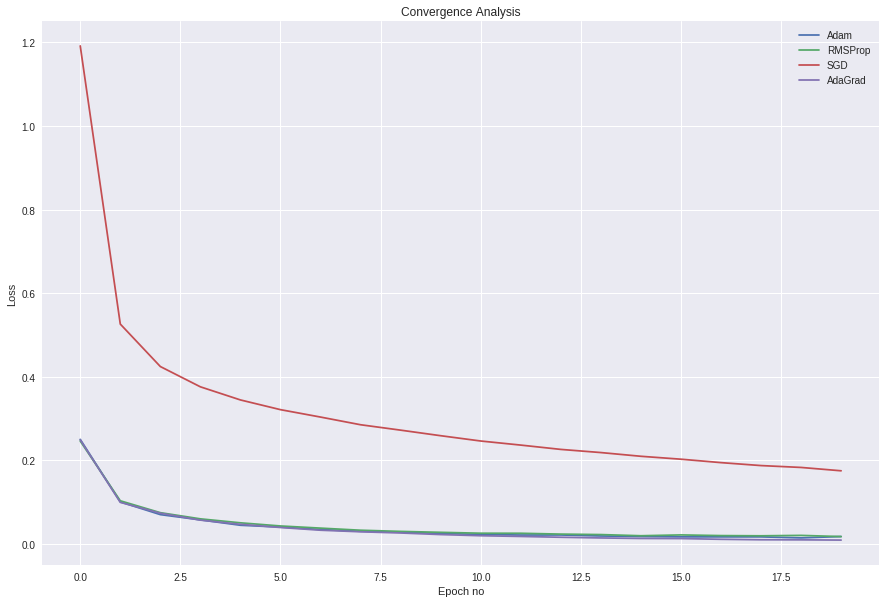

In [12]:
plt.figure(figsize = (15,10))
plt.title("Convergence Analysis")
plt.xlabel("Epoch no")
plt.ylabel("Loss")
plt.plot(history_adam.history['loss'], label= 'Adam')
plt.plot(history_rms.history['loss'], label= 'RMSProp')
plt.plot(history_sgd.history['loss'], label= 'SGD')
plt.plot(history_ada.history['loss'], label= 'AdaGrad')
plt.legend()
plt.show()

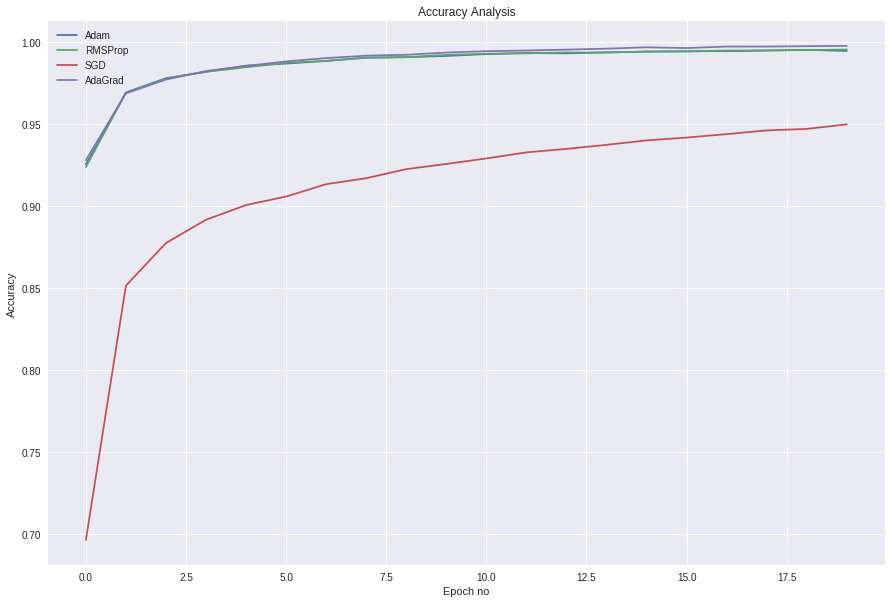

In [13]:
plt.figure(figsize = (15,10))
plt.title("Accuracy Analysis")
plt.xlabel("Epoch no")
plt.ylabel("Accuracy")
plt.plot(history_adam.history['acc'], label= 'Adam')
plt.plot(history_rms.history['acc'], label= 'RMSProp')
plt.plot(history_sgd.history['acc'], label= 'SGD')
plt.plot(history_ada.history['acc'], label= 'AdaGrad')
plt.legend()
plt.show()

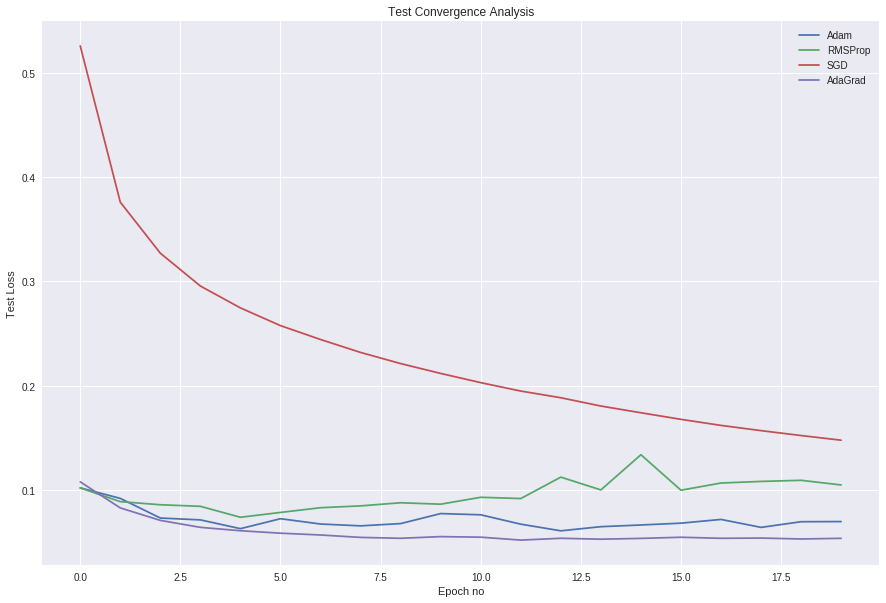

In [14]:
plt.figure(figsize = (15,10))
plt.title("Test Convergence Analysis")
plt.xlabel("Epoch no")
plt.ylabel("Test Loss")
plt.plot(history_adam.history['val_loss'], label= 'Adam')
plt.plot(history_rms.history['val_loss'], label= 'RMSProp')
plt.plot(history_sgd.history['val_loss'], label= 'SGD')
plt.plot(history_ada.history['val_loss'], label= 'AdaGrad')
plt.legend()
plt.show()

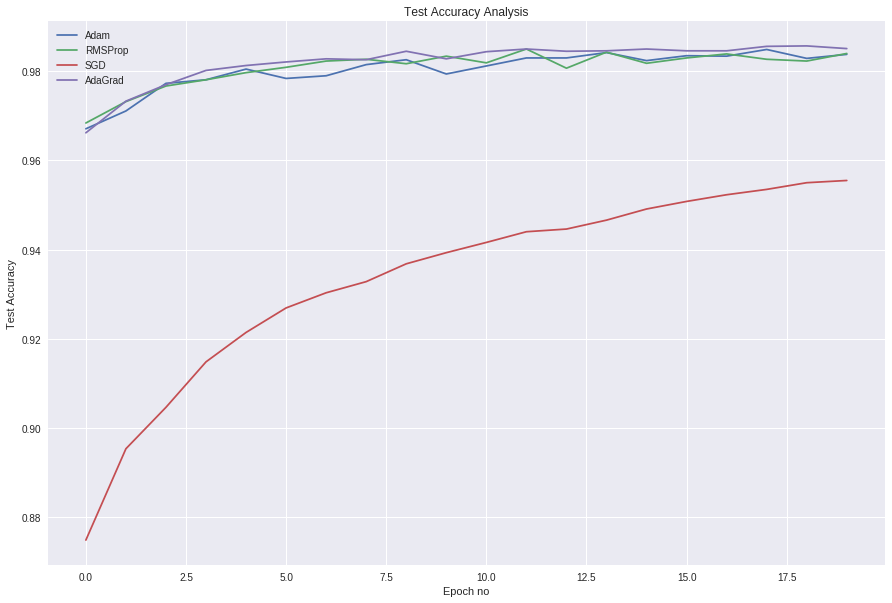

In [15]:
plt.figure(figsize = (15,10))
plt.title("Test Accuracy Analysis")
plt.xlabel("Epoch no")
plt.ylabel("Test Accuracy")
plt.plot(history_adam.history['val_acc'], label= 'Adam')
plt.plot(history_rms.history['val_acc'], label= 'RMSProp')
plt.plot(history_sgd.history['val_acc'], label= 'SGD')
plt.plot(history_ada.history['val_acc'], label= 'AdaGrad')
plt.legend()
plt.show()